In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [9]:
keywords_numerical_features = pd.read_csv('keywords_numerical_features.csv')
keywords_numerical_features.head()

,id,target,text_contains_keyword,has_keyword,keywords_quantity,keywords_mean,keyword_is_hashtag,keyword_frequency
0,1,1,1,1,1,0.004525,1,0.227027
1,4,1,1,1,1,0.004525,0,0.237838
2,5,1,1,1,1,0.004525,0,0.210811
3,6,1,1,1,1,0.004525,0,0.210811
4,7,1,1,1,1,0.004525,0,0.237838


In [45]:
x,y = keywords_numerical_features.iloc[:,2:7],keywords_numerical_features.iloc[:,1]

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state = 123)

In [82]:
rf_model = RandomForestRegressor(random_state = 1, n_estimators = 4, max_depth = 6)
rf_model.fit(x_train,y_train)
predicciones = rf_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,predicciones))
print("RMSE: %f" %(rmse))

RMSE: 0.476623


In [83]:
rf_model.feature_importances_

array([0.20397631, 0.00306488, 0.5689709 , 0.21838241, 0.00560551])

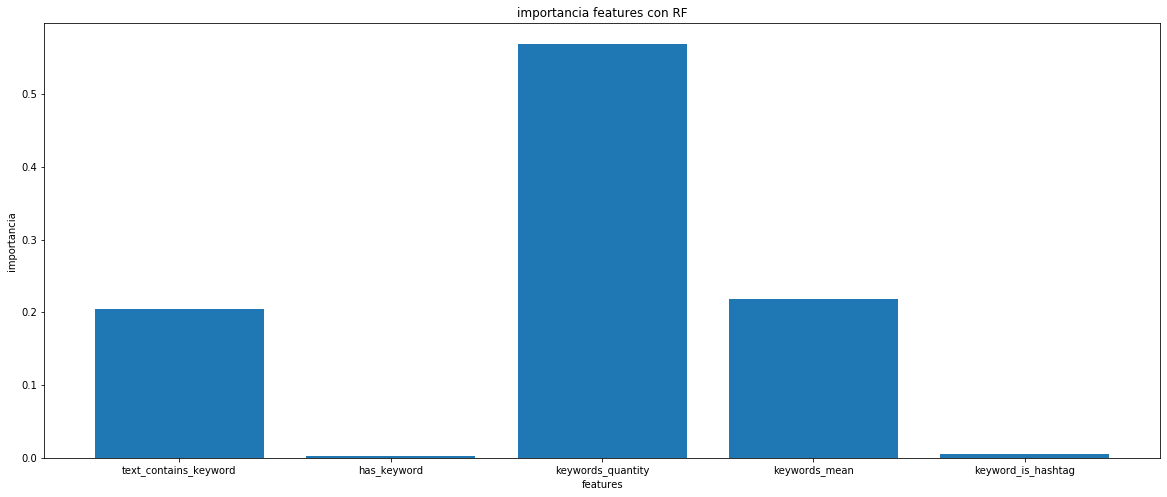

In [84]:
plt.bar(x_train.columns, rf_model.feature_importances_)
plt.xlabel ('features')
plt.ylabel ('importancia')
plt.title ('importancia features con RF')
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

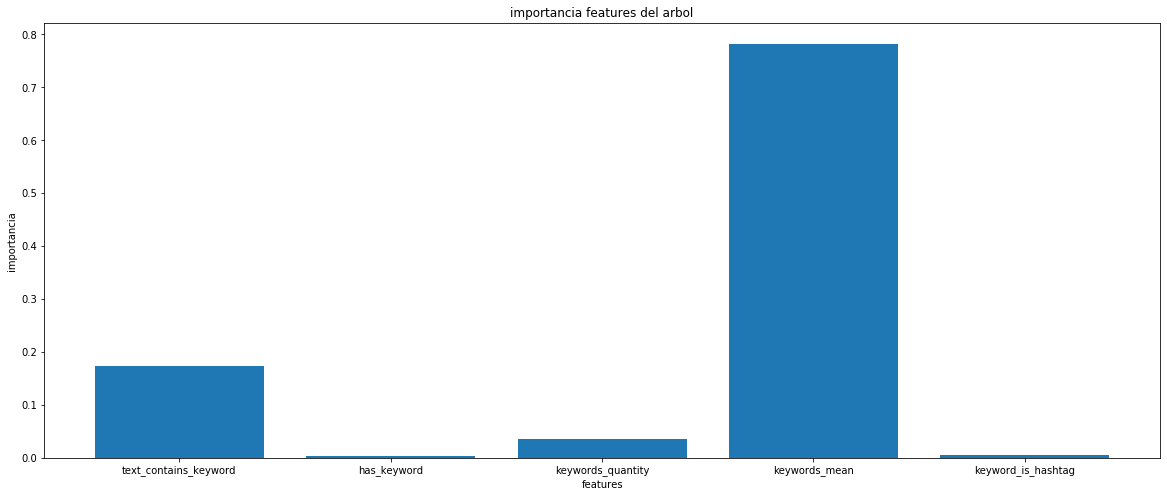

In [88]:
arbol = rf_model.estimators_[0]
plt.bar(x_train.columns, arbol.feature_importances_)
plt.xlabel('features')
plt.ylabel('importancia')
plt.title('importancia features del arbol')
plt.show

[Text(813.75, 1384.1666666666667, 'keywords_mean <= 0.007\nmse = 0.247\nsamples = 3844\nvalue = 0.442'),
 Text(387.5, 1132.5, 'keywords_quantity <= 0.5\nmse = 0.237\nsamples = 3284\nvalue = 0.385'),
 Text(232.5, 880.8333333333334, 'text_contains_keyword <= 0.5\nmse = 0.216\nsamples = 570\nvalue = 0.314'),
 Text(155.0, 629.1666666666667, 'has_keyword <= 0.5\nmse = 0.152\nsamples = 262\nvalue = 0.187'),
 Text(77.5, 377.5, 'mse = 0.0\nsamples = 8\nvalue = 0.0'),
 Text(232.5, 377.5, 'mse = 0.156\nsamples = 254\nvalue = 0.194'),
 Text(310.0, 629.1666666666667, 'mse = 0.244\nsamples = 308\nvalue = 0.421'),
 Text(542.5, 880.8333333333334, 'text_contains_keyword <= 0.5\nmse = 0.24\nsamples = 2714\nvalue = 0.4'),
 Text(465.0, 629.1666666666667, 'mse = 0.227\nsamples = 121\nvalue = 0.651'),
 Text(620.0, 629.1666666666667, 'keyword_is_hashtag <= 0.5\nmse = 0.237\nsamples = 2593\nvalue = 0.387'),
 Text(542.5, 377.5, 'mse = 0.237\nsamples = 2540\nvalue = 0.385'),
 Text(697.5, 377.5, 'mse = 0.249\ns

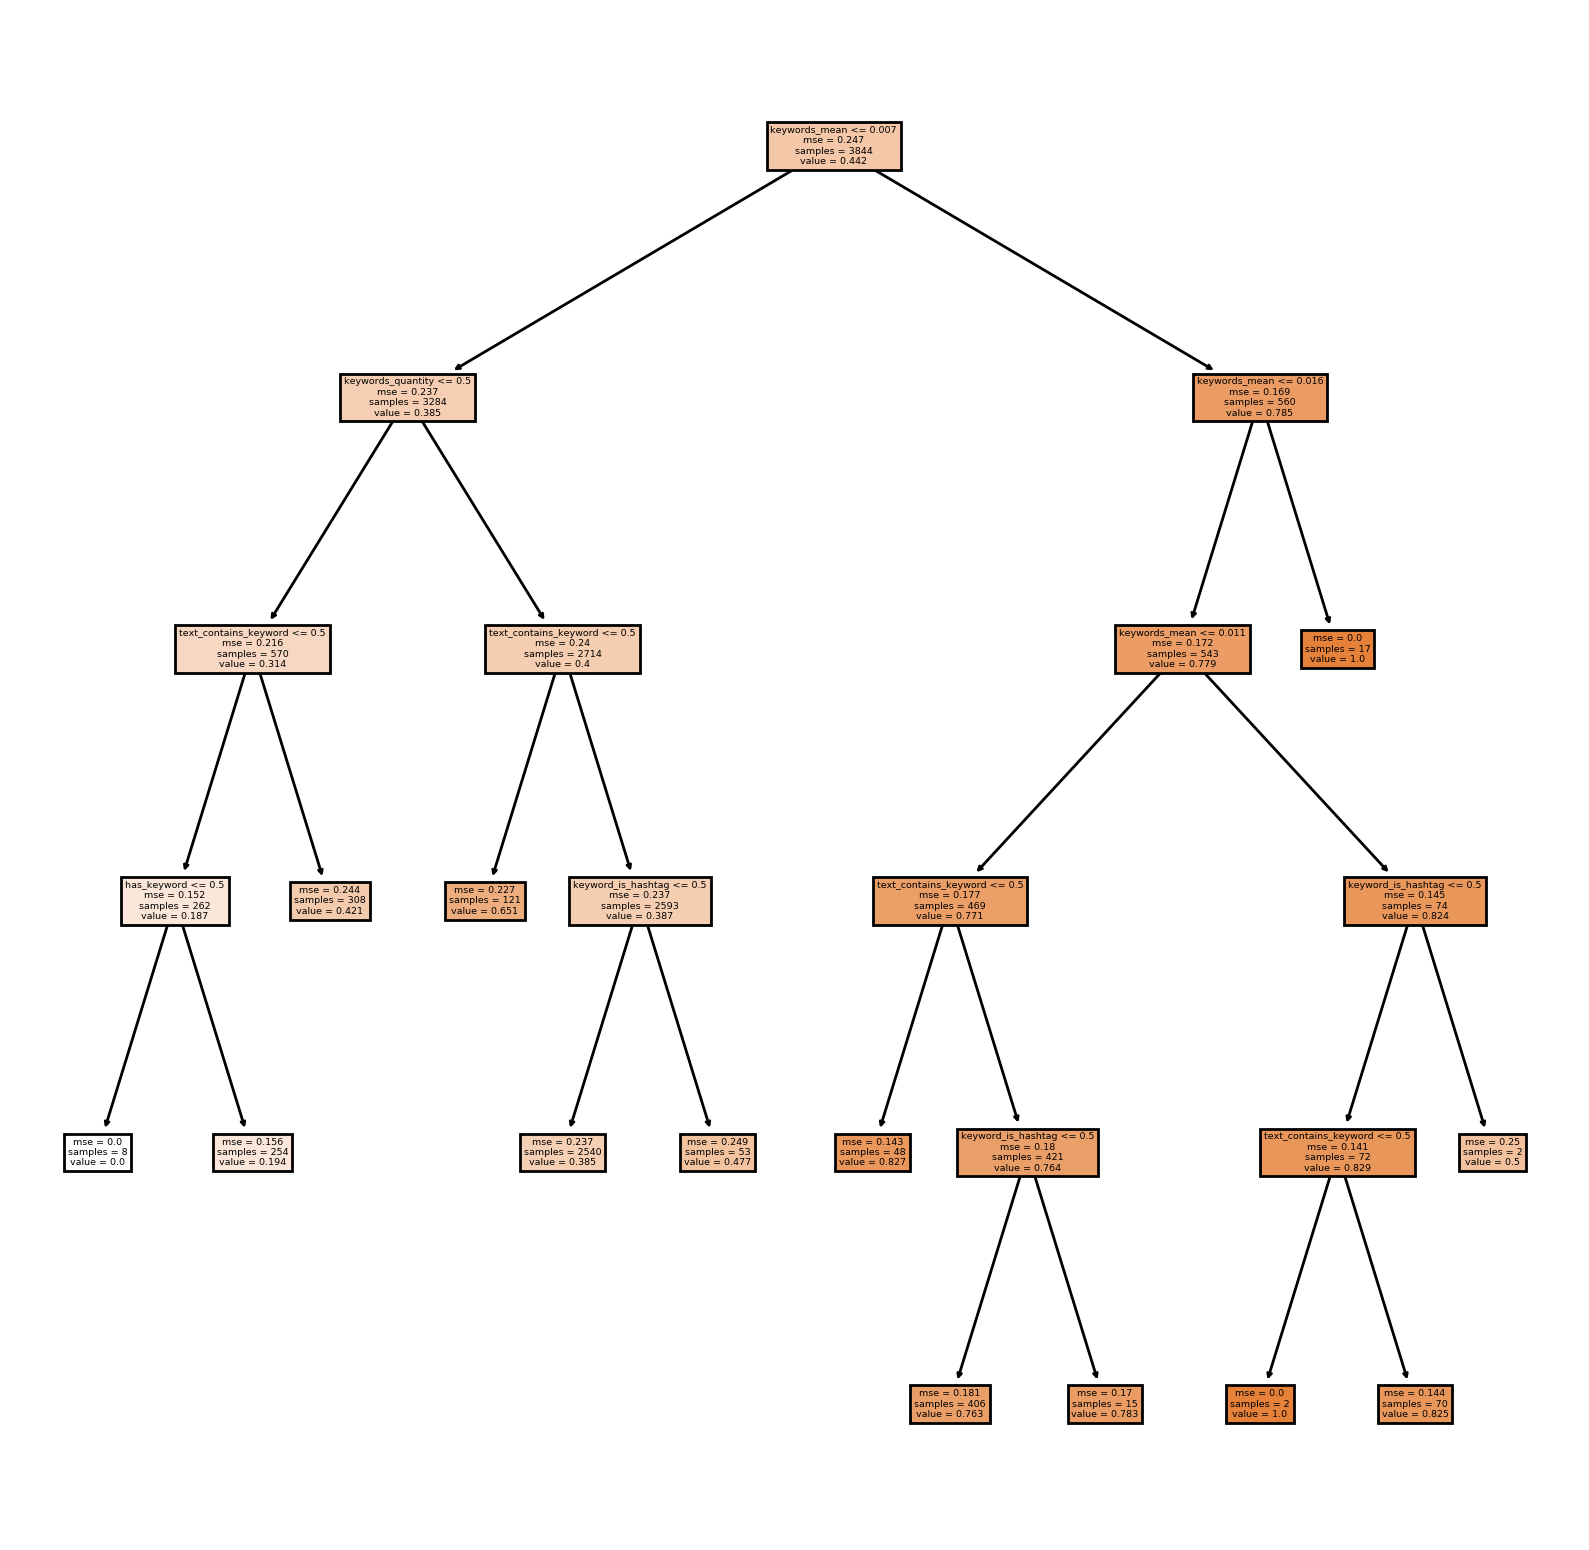

In [92]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10), dpi = 200)
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)

In [6]:
keywords_numerical_features.describe()

,id,target,text_contains_keyword,has_keyword,keywords_quantity,keywords_mean,keyword_is_hashtag,keyword_frequency
count,7613.000000,7613.00000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7597.000000
mean,5441.934848,0.42966,0.885985,0.997898,1.019703,0.004614,0.018390,0.256207
std,3137.116090,0.49506,0.317851,0.045799,0.647872,0.002932,0.134364,0.105473
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048649
25%,2734.000000,0.00000,1.000000,1.000000,1.000000,0.004525,0.000000,0.183784
50%,5408.000000,0.00000,1.000000,1.000000,1.000000,0.004525,0.000000,0.200000
75%,8146.000000,1.00000,1.000000,1.000000,1.000000,0.004525,0.000000,0.367568
max,10873.000000,1.00000,1.000000,1.000000,13.000000,0.058824,1.000000,0.567568


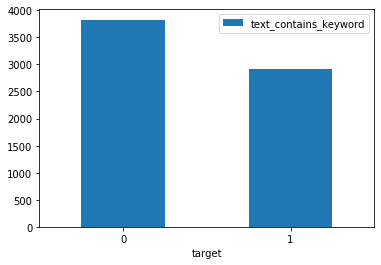

In [4]:
keywords_numerical_features_text_contains_keyword = keywords_numerical_features[['target','text_contains_keyword']]
keywords_numerical_features_text_contains_keyword = keywords_numerical_features_text_contains_keyword.groupby('target').agg({'text_contains_keyword':'sum'})
keywords_numerical_features_text_contains_keyword = keywords_numerical_features_text_contains_keyword.reset_index()
keywords_numerical_features_text_contains_keyword.head()
text_contains_keyword_chart = keywords_numerical_features_text_contains_keyword.plot.bar(x='target', y='text_contains_keyword', rot=0)

In [5]:
keywords_numerical_features_text_contains_keyword

,target,text_contains_keyword
0,0,3826
1,1,2919


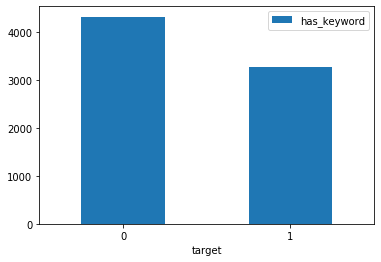

In [20]:
keywords_numerical_features_text_has_keyword = keywords_numerical_features[['target','has_keyword']]
keywords_numerical_features_text_has_keyword = keywords_numerical_features_text_has_keyword.groupby('target').agg({'has_keyword':'sum'})
keywords_numerical_features_text_has_keyword = keywords_numerical_features_text_has_keyword.reset_index()
keywords_numerical_features_text_has_keyword.head()
text_has_keyword_chart = keywords_numerical_features_text_has_keyword.plot.bar(x='target', y='has_keyword', rot=0)

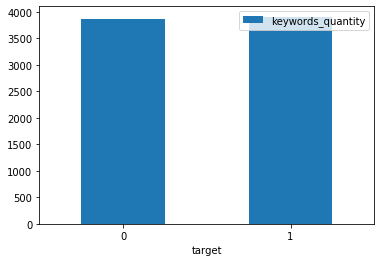

In [22]:
keywords_numerical_features_keywords_quantity = keywords_numerical_features[['target','keywords_quantity']]
keywords_numerical_features_keywords_quantity = keywords_numerical_features_keywords_quantity.groupby('target').agg({'keywords_quantity':'sum'})
keywords_numerical_features_keywords_quantity = keywords_numerical_features_keywords_quantity.reset_index()
keywords_numerical_features_keywords_quantity.head()
keywords_quantity_chart = keywords_numerical_features_keywords_quantity.plot.bar(x='target', y='keywords_quantity', rot=0)

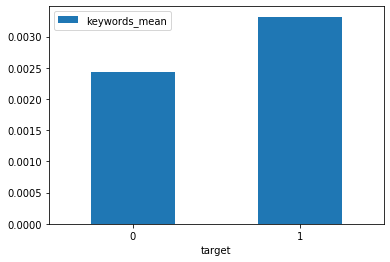

In [44]:
keywords_numerical_features_keywords_mean = keywords_numerical_features[['target','keywords_mean']]
keywords_numerical_features_keywords_mean = keywords_numerical_features_keywords_mean.groupby('target').agg({'keywords_mean':'std'})
keywords_numerical_features_keywords_mean = keywords_numerical_features_keywords_mean.reset_index()
keywords_numerical_features_keywords_mean.head()
keywords_mean_chart = keywords_numerical_features_keywords_mean.plot.bar(x='target', y='keywords_mean', rot=0)

In [51]:
keywords_numerical_features_keywords_mean_second = keywords_numerical_features[['target','keywords_mean']]
keywords_numerical_features_keywords_mean_second.head()

,target,keywords_mean
0,1,0.004525
1,1,0.004525
2,1,0.004525
3,1,0.004525
4,1,0.004525


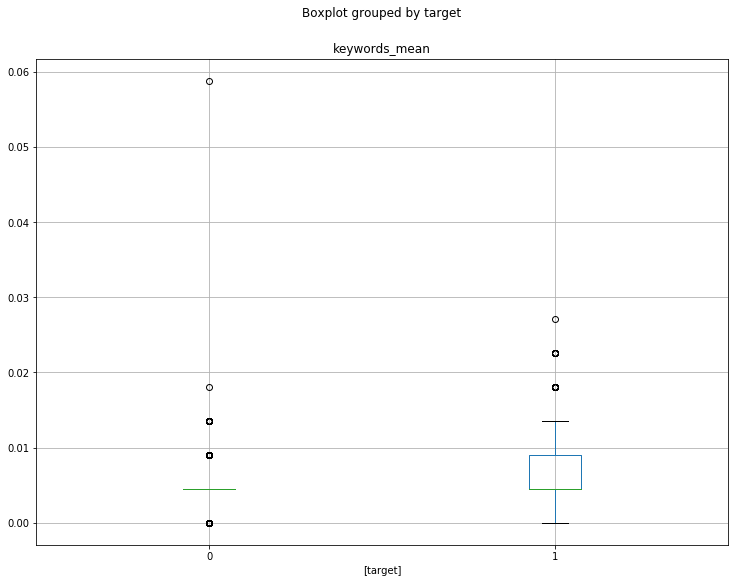

In [59]:
keywords_numerical_features_keywords_mean_second_boxplot = keywords_numerical_features_keywords_mean_second.boxplot(by='target', figsize=[12,9])

In [60]:
keywords_numerical_features_keywords_frequency = keywords_numerical_features[['target','keyword_frequency']]
keywords_numerical_features_keywords_frequency.head()

,target,keyword_frequency
0,1,0.227027
1,1,0.237838
2,1,0.210811
3,1,0.210811
4,1,0.237838


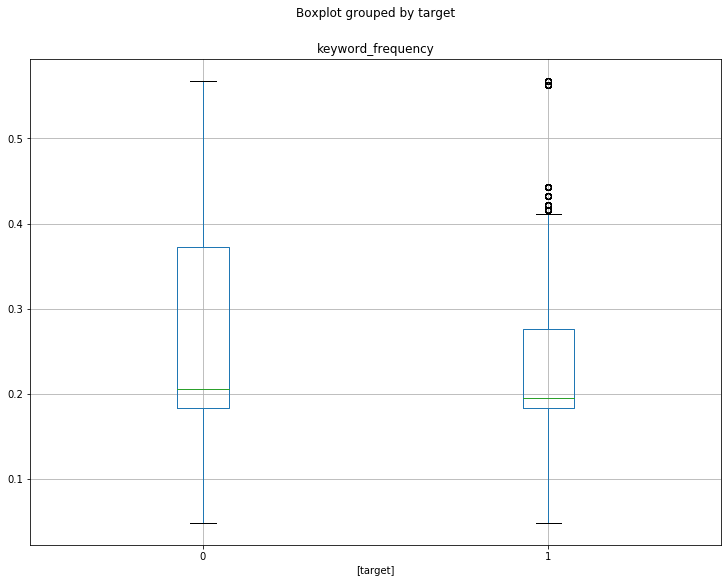

In [61]:
keywords_numerical_features_keywords_frequency_boxplot = keywords_numerical_features_keywords_frequency.boxplot(by='target', figsize=[12,9])